In [159]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats


PROCESSED_DATA_PATH = './data/processed'
PLOTS_PATH = './plots'
CPI_PATH = './data/raw/CPIAUCNS.csv'

In [2]:
df_chars_extended = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'chars_extended.csv'))
df_chars_extended['movie_release'] = df_chars_extended['movie_release'].apply(lambda x: np.NaN if x is np.NaN else datetime.strptime(x, '%Y-%m-%d').year)
df_chars_extended.head()

,movie_freebase_id,movie_id,movie_name,movie_genre,movie_origin,movie_release,box_office_value,director_id,director_name,director_gender,...,cast_3_country,cast_3_birth,cast_3_age_at_release,cast_id_4,cast_4_name,cast_4_gender,cast_4_country,cast_4_birth,cast_4_age_at_release,movie_imdb_id
0,/m/02rjv0t,Q1000394,This Modern Age,drama film,United States of America,1931.0,NaN,Q1985392,Nick Grinde,male,...,France,1878-06-02,53.0,Q2831060,Albert Conti,male,United States of America,1887-01-29,44.0,tt0022478
1,/m/0gjdn2_,Q1000174,Tinko,NaN,NaN,1957.0,NaN,Q1379822,Herbert Ballmann,male,...,Germany,1898-02-21,59.0,Q1442953,Hans Hardt-Hardtloff,male,Germany,1906-08-08,51.0,tt0131068
2,/m/0g5xtz,Q1000825,Jan Dara,LGBT-related film,Thailand,2001.0,NaN,Q360509,Nonzee Nimibutr,male,...,Thailand,1940-01-24,61.0,Q16305292,NaN,male,NaN,1975-03-26,26.0,tt0282628
3,/m/0czdkjd,Q1001102,The Rat Savior,horror film,Socialist Federal Republic of Yugoslavia,1976.0,NaN,Q3199956,Krsto Papić,male,...,Croatia,1932-01-04,44.0,Q12628320,Branko Špoljar,male,NaN,1914-01-05,62.0,tt0074701
4,/m/0f1r9p,Q1000826,Guns of the Magnificent Seven,Western film,United States of America,1969.0,NaN,Q450601,Paul Wendkos,male,...,United States of America,1914-07-24,55.0,Q465643,George Rigaud,male,Argentina,1905-08-11,64.0,tt0064395


Gender comparison using the ratio between Male and Female

In [73]:
df_genders = df_chars_extended[['movie_id', 'movie_release', 'movie_genre', 'director_gender', 'producer_gender', 'cast_0_gender', 'cast_1_gender','cast_2_gender','cast_3_gender','cast_4_gender']]
df_genders = df_genders[df_genders['movie_release'].notna()]
df_genders['movie_release'] = df_genders['movie_release'].astype(int)
df_genders = df_genders.sort_values('movie_release')
df_genders.head()

,movie_id,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender
46998,Q572269,1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73440,Q875764,1815,fairy tale,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30038,Q3924909,1878,nature documentary,male,male,NaN,NaN,NaN,NaN,NaN
18742,Q267176,1888,documentary film,male,male,female,male,male,female,NaN
12560,Q1854297,1889,documentary film,male,male,male,NaN,NaN,NaN,NaN


Get count of occurences of male and female

In [74]:
col_actors = ['cast_0_gender', 'cast_1_gender', 'cast_2_gender', 'cast_3_gender', 'cast_4_gender']
col_director = ['director_gender']
col_producer = ['producer_gender']

# Compute ratio and normalize
df_genders['male_all'] = 100*(df_genders == 'male').T.sum() / ((df_genders == 'male').T.sum() + (df_genders == 'female').T.sum())
df_genders['male_actors'] = 100*(df_genders[col_actors] == 'male').T.sum() / ((df_genders[col_actors] == 'male').T.sum() + (df_genders[col_actors] == 'female').T.sum())
df_genders['male_director'] = 100*(df_genders['director_gender'] == 'male').astype(int) / ((df_genders['director_gender'] == 'male').astype(int) + (df_genders['director_gender'] == 'female').astype(int))
df_genders['male_producer'] = 100*(df_genders['producer_gender'] == 'male').astype(int) / ((df_genders['producer_gender'] == 'male').astype(int) + (df_genders['producer_gender'] == 'female').astype(int))

df_genders['female_all'] = 100*(df_genders == 'female').T.sum() / ((df_genders == 'male').T.sum() + (df_genders == 'female').T.sum())
df_genders['female_actors'] = 100*(df_genders[col_actors] == 'female').T.sum() / ((df_genders[col_actors] == 'male').T.sum() + (df_genders[col_actors] == 'female').T.sum())
df_genders['female_director'] = 100*(df_genders['director_gender'] == 'female').astype(int) / ((df_genders['director_gender'] == 'male').astype(int) + (df_genders['director_gender'] == 'female').astype(int))
df_genders['female_producer'] = 100*(df_genders['producer_gender'] == 'female').astype(int) / ((df_genders['producer_gender'] == 'male').astype(int) + (df_genders['producer_gender'] == 'female').astype(int))

df_genders.head()

,movie_id,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
46998,Q572269,1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73440,Q875764,1815,fairy tale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30038,Q3924909,1878,nature documentary,male,male,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,100.0,100.0,0.000000,NaN,0.0,0.0
18742,Q267176,1888,documentary film,male,male,female,male,male,female,NaN,66.666667,50.0,100.0,100.0,33.333333,50.0,0.0,0.0
12560,Q1854297,1889,documentary film,male,male,male,NaN,NaN,NaN,NaN,100.000000,100.0,100.0,100.0,0.000000,0.0,0.0,0.0


In [75]:
df_genders_per_year = df_genders.groupby('movie_release').agg({
    'male_all':['mean', 'std'],
    'male_actors':['mean', 'std'],
    'male_director':['mean', 'std'],
    'male_producer':['mean', 'std'],
    'female_all':['mean', 'std'],
    'female_actors':['mean', 'std'],
    'female_director':['mean', 'std'],
    'female_producer':['mean', 'std'],
})
df_genders_per_year.columns = [
    'male_all',
    'male_all_std',
    'male_actors',
    'male_actors_std',
    'male_director',
    'male_director_std',
    'male_producer',
    'male_producer_std',
    'female_all',
    'female_all_std',
    'female_actors',
    'female_actors_std',
    'female_director',
    'female_director_std',
    'female_producer',
    'female_producer_std',
]
df_genders_per_year = df_genders_per_year[df_genders_per_year.T.sum() > 0]
df_genders_per_year = df_genders_per_year.dropna()

std_cols = ['male_all_std', 'female_all_std', 'male_actors_std', 'female_actors_std', 'male_director_std', 'female_director_std', 'male_producer_std', 'female_producer_std']

df_stds = df_genders_per_year[std_cols]

df_genders_per_year = df_genders_per_year.drop(columns=std_cols)

df_genders_per_year.head()

,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
movie_release,,,,,,,,
1894,96.969697,66.666667,100.000000,100.0,3.030303,33.333333,0.000000,0.0
1895,98.076923,87.500000,100.000000,100.0,1.923077,12.500000,0.000000,0.0
1896,95.833333,79.761905,98.245614,100.0,4.166667,20.238095,1.754386,0.0
1897,95.098039,71.428571,100.000000,100.0,4.901961,28.571429,0.000000,0.0
1898,98.717949,83.333333,100.000000,100.0,1.282051,16.666667,0.000000,0.0


In [77]:
# set up start plot
fig = px.line(
    df_genders_per_year, 
    y=df_genders_per_year.columns, 
    labels={
        'movie_release': 'Movie release',
        'value': 'Ratio in percentage',
        'male_all': 'Male',
    }
)

cat_stds = ['male_all', 'female_all', 'male_actors', 'female_actors', 'male_director', 'female_director', 'male_producer', 'female_producer']
for cat_std in cat_stds:
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_genders_per_year.index),
            y=df_genders_per_year[cat_std] + df_stds['{}_std'.format(cat_std)],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False
        )
    )
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_genders_per_year.index),
            y=df_genders_per_year[cat_std] - df_stds['{}_std'.format(cat_std)],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty',
            showlegend=False
        )
    )

# groups and trace visibilities
categories = {
    'All':['male_all', 'female_all'], 
    'Lead Actors':['male_actors', 'female_actors'],
    'Directors':['male_director', 'female_director'],
    'Producers':['male_producer', 'female_producer'],
}
visibleCats = {}
for cat, cols in categories.items():
    visibleCats[cat] = [col in cols for col in df_genders_per_year.columns]

for cat, cols in categories.items():
    vis = [2*[col[:-4] in cols] for col in df_stds.columns]
    visFlat = [item for sublist in vis for item in sublist]
    visibleCats[cat].extend(visFlat)

buttons = []
for cat, vis in visibleCats.items():
    button = dict(label=cat,
                    method = 'restyle',
                    args = ['visible',vis])
    buttons.append(button)

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
    hovermode='x'
)

variableNames = {
    'male_all': 'Male',
    'female_all': 'Female',
    'male_actors': 'Male lead actors',
    'female_actors': 'Female lead actors',
    'male_director': 'Male directors',
    'female_director': 'Female directors',
    'male_producer': 'Male producers',
    'female_producer': 'Female prooducers',
    'male_all_upper':'Male upper bound',
    'male_all_lower':'Male lower bound',
}

fig.for_each_trace(
    lambda t: t.update(
        visible = True if t.name in categories['All'] else "legendonly",
        name = variableNames.get(t.name) if variableNames.get(t.name) else t.name
    )
)

fig.update_layout(
    title={
        'text': "Comparison of gender distribution in percentage over time",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# buttons
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_ratio.html'))

'./plots/gender_ratio.html'

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_ratio ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


Gender by genre

In [237]:
# df_genres_gender = df_chars_extended[['movie_release', 'movie_genre', 'director_gender', 'producer_gender', 'cast_0_gender', 'cast_1_gender','cast_2_gender','cast_3_gender','cast_4_gender']]
genres = df_genders['movie_genre'].unique()
print(len(genres))
print(df_genders['movie_genre'].value_counts()[:25])
# print(df_chars_extended['movie_genre'].unique())
# print(len(df_chars_extended[df_chars_extended['movie_genre']=='LGBT-related film']))

432
drama film              14922
comedy film              7423
documentary film         4391
horror film              3283
action film              3097
silent film              2828
romantic comedy          2731
musical film             1990
crime film               1920
romance film             1857
comedy drama             1645
Western film             1436
science fiction film     1314
biographical film        1180
fantasy film             1172
thriller film            1099
adventure film            898
war film                  773
teen film                 607
mystery film              598
children's film           494
LGBT-related film         409
comedy horror             383
spy film                  350
heist film                300
Name: movie_genre, dtype: int64


In [85]:
# genre_cols = [
#     'movie_id',
#     'movie_release', 
#     'movie_genre', 
#     'director_gender', 
#     'producer_gender',
#     'cast_0_gender',
#     'cast_1_gender',
#     'cast_2_gender',
#     'cast_3_gender',
#     'cast_4_gender',
# ]
# df_genres_gender = df_chars_extended[genre_cols]
# df_genres_gender = df_genres_gender[df_genres_gender['movie_release'].notna() & df_genres_gender['movie_genre'].notna()]
# df_genres_gender['male_count'] = (df_genres_gender == 'male').T.sum().copy()
# df_genres_gender['female_count'] = (df_genres_gender == 'female').T.sum().copy()
# df_genres_gender = df_genres_gender[df_genres_gender['male_count'] + df_genres_gender['female_count'] > 0]
# df_genres_gender = df_genres_gender[['movie_release', 'movie_genre', 'male_count', 'female_count']]
# df_genres_gender['movie_release'] = df_genres_gender['movie_release'].astype(int)
# df_genres_gender = df_genres_gender.sort_values('movie_release')
# df_genres_gender.head()



74901
71995


In [238]:
df_genders.head()

,movie_id,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
46998,Q572269,1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73440,Q875764,1815,fairy tale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30038,Q3924909,1878,nature documentary,male,male,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,100.0,100.0,0.000000,NaN,0.0,0.0
18742,Q267176,1888,documentary film,male,male,female,male,male,female,NaN,66.666667,50.0,100.0,100.0,33.333333,50.0,0.0,0.0
12560,Q1854297,1889,documentary film,male,male,male,NaN,NaN,NaN,NaN,100.000000,100.0,100.0,100.0,0.000000,0.0,0.0,0.0


In [297]:
df_genres_gender = df_genders.copy()
print(len(df_genres_gender))
df_genres_gender = df_genres_gender[(df_genres_gender == 'male').T.sum() + (df_genres_gender == 'female').T.sum() > 0]
print(len(df_genres_gender))
# df_genres_gender = df_genres_gender.dropna()
print(len(df_genres_gender))

# Groupy by multiple years and use the start of interval as release year
df_genres_gender['movie_release'] = pd.to_datetime(df_genres_gender['movie_release'].astype(str), format='%Y')
df_genres_gender = df_genres_gender.groupby([pd.cut(df_genres_gender['movie_release'], pd.date_range('1885', '2030', freq='5Y')), 'movie_genre']).mean().reset_index()
df_genres_gender['movie_release'] = df_genres_gender['movie_release'].astype(str).str.extract('\((.+?),').astype('datetime64[ns]').squeeze().dt.year

# Or groupby every year
# df_genres_gender = df_genres_gender.groupby(['movie_release', 'movie_genre']).mean().reset_index()
# df_genres_gender = df_genres_gender.dropna(axis=0, subset=['male_all', 'female_all'])
# df_genres_gender = df_genres_gender[(df_genres_gender == 'male').T.sum() + (df_genres_gender == 'female').T.sum() > 0]
df_genres_gender = df_genres_gender[df_genres_gender['male_all'].notna()]
print(len(df_genres_gender))
df_genres_gender.head()

74901
71995
71995
2415


,movie_release,movie_genre,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
89,1885,comedy film,100.000000,NaN,100.0,100.0,0.000000,NaN,0.0,0.0
123,1885,documentary film,91.666667,75.0,100.0,100.0,8.333333,25.0,0.0,0.0
393,1890,LGBT-related film,100.000000,100.0,100.0,100.0,0.000000,0.0,0.0,0.0
404,1890,Western film,100.000000,NaN,100.0,100.0,0.000000,NaN,0.0,0.0
469,1890,comedy film,100.000000,100.0,100.0,100.0,0.000000,0.0,0.0,0.0


In [305]:
df_all = df_genres_gender[['movie_release', 'movie_genre', 'male_all', 'female_all']]
df_actors = df_genres_gender[['movie_release', 'movie_genre', 'male_actors', 'female_actors']]

In [306]:
# Rename columns for wide_to_log
df_all.columns = ['movie_release', 'movie_genre', 'percentage_male_all', 'percentage_female_all']
# Use reset_index to create a new column 'index'
df_all = df_all.reset_index()
df_all = pd.wide_to_long(df_all, stubnames='percentage',
                          i=['index', 'movie_release', 'movie_genre'], j='category',
                          sep='_', suffix='\w+').reset_index()
df_all = df_all.drop(columns=['index'])
df_all = df_all.dropna()
df_all.head()

,movie_release,movie_genre,category,percentage
0,1885,comedy film,male_all,100.000000
1,1885,comedy film,female_all,0.000000
2,1885,documentary film,male_all,91.666667
3,1885,documentary film,female_all,8.333333
4,1890,LGBT-related film,male_all,100.000000


In [307]:
# Rename columns for wide_to_log
df_actors.columns = ['movie_release', 'movie_genre', 'percentage_male_actors', 'percentage_female_actors']
# Use reset_index to create a new column 'index'
df_actors = df_actors.reset_index()
df_actors = pd.wide_to_long(df_actors, stubnames='percentage',
                          i=['index', 'movie_release', 'movie_genre'], j='category',
                          sep='_', suffix='\w+').reset_index()
df_actors = df_actors.drop(columns=['index'])
df_actors = df_actors.dropna()
df_actors.head()

,movie_release,movie_genre,category,percentage
2,1885,documentary film,male_actors,75.0
3,1885,documentary film,female_actors,25.0
4,1890,LGBT-related film,male_actors,100.0
5,1890,LGBT-related film,female_actors,0.0
8,1890,comedy film,male_actors,100.0


In [243]:
# # Rename columns for wide_to_log
# df_genres_gender.columns = ['movie_release', 'movie_genre', 'percentage_male_all', 'percentage_male_actors', 'percentage_male_director', 'percentage_male_producer', 'percentage_female_all', 'percentage_female_actors', 'percentage_female_director', 'percentage_female_produce']
# # Use reset_index to create a new column 'index'
# df_genres_gender = df_genres_gender.reset_index()
# df_genres_gender = pd.wide_to_long(df_genres_gender, stubnames='percentage',
#                           i=['index', 'movie_release', 'movie_genre'], j='category',
#                           sep='_', suffix='\w+').reset_index()
# df_genres_gender = df_genres_gender.drop(columns=['index'])
# df_genres_gender.head()

,movie_release,movie_genre,category,percentage
0,1885,American football film,male_all,NaN
1,1885,American football film,male_actors,NaN
2,1885,American football film,male_director,NaN
3,1885,American football film,male_producer,NaN
4,1885,American football film,female_all,NaN


Fill in missing genres to display on plot

In [308]:
genders = ['male_all', 'female_all']
genres = list(df_genres_gender['movie_genre'].value_counts()[:12].index)
genres.append('LGBT-related film')
df_all = df_all[df_all['movie_genre'].isin(genres)].copy()
missing_genres_rows = []
for year in df_all['movie_release'].unique():
    genres_year = set(df_all[df_all['movie_release']==year]['movie_genre'].unique())
    missing_genres = list(set(genres) - genres_year)
    for missing_genre in missing_genres:
        for gender in genders:
            missing_genres_rows.append({'movie_release':year, 'movie_genre':missing_genre, 'category':gender, 'percentage':0})

df_missing_genres = pd.DataFrame.from_records(missing_genres_rows)
df_all = pd.concat([df_all, df_missing_genres])
df_all = df_all.sort_values(['movie_release', 'movie_genre'])
df_all.head()

,movie_release,movie_genre,category,percentage
4,1885,LGBT-related film,male_all,0.0
5,1885,LGBT-related film,female_all,0.0
2,1885,Western film,male_all,0.0
3,1885,Western film,female_all,0.0
6,1885,action film,male_all,0.0


In [309]:
genders = ['male_actors', 'female_actors']
genres = list(df_genres_gender['movie_genre'].value_counts()[:12].index)
genres.append('LGBT-related film')
df_actors = df_actors[df_actors['movie_genre'].isin(genres)].copy()
missing_genres_rows = []
for year in df_actors['movie_release'].unique():
    genres_year = set(df_actors[df_actors['movie_release']==year]['movie_genre'].unique())
    missing_genres = list(set(genres) - genres_year)
    for missing_genre in missing_genres:
        for gender in genders:
            missing_genres_rows.append({'movie_release':year, 'movie_genre':missing_genre, 'category':gender, 'percentage':0})

df_missing_genres = pd.DataFrame.from_records(missing_genres_rows)
df_actors = pd.concat([df_actors, df_missing_genres])
df_actors = df_actors.sort_values(['movie_release', 'movie_genre'])
df_actors.head()

,movie_release,movie_genre,category,percentage
4,1885,LGBT-related film,male_actors,0.0
5,1885,LGBT-related film,female_actors,0.0
2,1885,Western film,male_actors,0.0
3,1885,Western film,female_actors,0.0
6,1885,action film,male_actors,0.0


In [310]:
fig = px.bar(
        df_all, 
        x='percentage', 
        y='movie_genre', 
        range_x=[0, 100],
        color='category',
        animation_frame='movie_release', 
        barmode='stack', 
        orientation='h',
    )
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_per_genre_over_time5y.html'))

'./plots/gender_per_genre_over_time5y.html'

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_per_g ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


In [311]:
fig = px.bar(
        df_actors, 
        x='percentage', 
        y='movie_genre', 
        range_x=[0, 100],
        color='category',
        animation_frame='movie_release', 
        barmode='stack', 
        orientation='h',
    )
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_per_genre_over_time5y.html'))

'./plots/gender_per_genre_over_time5y.html'

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_per_g ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


In [ ]:
# set up start plot
# fig = px.bar(
#     df_genres_gender, 
#     y=df_genres_gender.columns, 
#     labels={
#         'index': 'Box office value in $ adjusted to inflation',
#         'box_office_value': 'Box office value in $ adjusted to inflation',
#         'value': 'Percentage of Male and Female',
#     },
#     markers=True,
#     log_x=True,
# )
# fig = px.bar(
#     df_genres_gender, 
#     # x='percentage', 
#     y='movie_genre', 
#     # y=df_genres_gender.columns, 
#     range_x=[0, 100],
#     # color='category',
#     animation_frame='movie_release', 
#     barmode='stack', 
#     orientation='h',
# )

fig = go.Figure()
fig.add_trace(
    go.Bar(
        name='all',
        x=df_all['movie_release']
        y=df_all['movie_genre']
        range_x = [0, 100]
        animation_frame='movie_release', 
        barmode='stack', 
        orientation='h',
    )
)

# cat_stds = ['male_all', 'female_all', 'male_actors', 'female_actors', 'male_director', 'female_director', 'male_producer', 'female_producer']
# for cat_std in cat_stds:
#     fig.add_trace(
#         go.Scatter(
#             name=cat_std,
#             x=list(df_genres_gender.index),
#             y=df_genres_gender[cat_std] + df_stds['{}_std'.format(cat_std)],
#             mode='lines',
#             marker=dict(color="#444"),
#             line=dict(width=0),
#             showlegend=False
#         )
#     )
#     fig.add_trace(
#         go.Scatter(
#             name=cat_std,
#             x=list(df_genres_gender.index),
#             y=df_genres_gender[cat_std] - df_stds['{}_std'.format(cat_std)],
#             marker=dict(color="#444"),
#             line=dict(width=0),
#             mode='lines',
#             fillcolor='rgba(68, 68, 68, 0.3)',
#             fill='tonexty',
#             showlegend=False
#         )
#     )

# groups and trace visibilities
categories = {
    'All':['male_all', 'female_all'], 
    'Lead Actors':['male_actors', 'female_actors'],
    'Directors':['male_director', 'female_director'],
    'Producers':['male_producer', 'female_producer'],
}
visibleCats = {}
for cat, cols in categories.items():
    visibleCats[cat] = [col in cols for col in df_genres_gender.columns]

# for cat, cols in categories.items():
#     vis = [2*[col[:-4] in cols] for col in df_stds.columns]
#     visFlat = [item for sublist in vis for item in sublist]
#     visibleCats[cat].extend(visFlat)

buttons = []
for cat, vis in visibleCats.items():
    button = dict(label=cat,
                    method = 'restyle',
                    args = ['visible',vis])
    buttons.append(button)

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
    hovermode='x'
)

variableNames = {
    'male_all': 'Male',
    'female_all': 'Female',
    'male_actors': 'Male lead actors',
    'female_actors': 'Female lead actors',
    'male_director': 'Male directors',
    'female_director': 'Female directors',
    'male_producer': 'Male producers',
    'female_producer': 'Female prooducers',
}

fig.for_each_trace(
    lambda t: t.update(
        visible = True if t.name in categories['All'] else "legendonly",
        name = variableNames.get(t.name) if variableNames.get(t.name) else t.name
    )
)

fig.update_layout(
    title={
        'text': "Comparison of gender distribution in percentage with the box office revenue",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

# buttons
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_ratio_box_office.html'))

In [259]:
# set up start plot
# fig = px.bar(
#     df_genres_gender, 
#     y=df_genres_gender.columns, 
#     labels={
#         'index': 'Box office value in $ adjusted to inflation',
#         'box_office_value': 'Box office value in $ adjusted to inflation',
#         'value': 'Percentage of Male and Female',
#     },
#     markers=True,
#     log_x=True,
# )
fig = px.bar(
    df_genres_gender, 
    # x='percentage', 
    y='movie_genre', 
    # y=df_genres_gender.columns, 
    range_x=[0, 100],
    # color='category',
    animation_frame='movie_release', 
    barmode='stack', 
    orientation='h',
)

# cat_stds = ['male_all', 'female_all', 'male_actors', 'female_actors', 'male_director', 'female_director', 'male_producer', 'female_producer']
# for cat_std in cat_stds:
#     fig.add_trace(
#         go.Scatter(
#             name=cat_std,
#             x=list(df_genres_gender.index),
#             y=df_genres_gender[cat_std] + df_stds['{}_std'.format(cat_std)],
#             mode='lines',
#             marker=dict(color="#444"),
#             line=dict(width=0),
#             showlegend=False
#         )
#     )
#     fig.add_trace(
#         go.Scatter(
#             name=cat_std,
#             x=list(df_genres_gender.index),
#             y=df_genres_gender[cat_std] - df_stds['{}_std'.format(cat_std)],
#             marker=dict(color="#444"),
#             line=dict(width=0),
#             mode='lines',
#             fillcolor='rgba(68, 68, 68, 0.3)',
#             fill='tonexty',
#             showlegend=False
#         )
#     )

# groups and trace visibilities
categories = {
    'All':['male_all', 'female_all'], 
    'Lead Actors':['male_actors', 'female_actors'],
    'Directors':['male_director', 'female_director'],
    'Producers':['male_producer', 'female_producer'],
}
visibleCats = {}
for cat, cols in categories.items():
    visibleCats[cat] = [col in cols for col in df_genres_gender.columns]

# for cat, cols in categories.items():
#     vis = [2*[col[:-4] in cols] for col in df_stds.columns]
#     visFlat = [item for sublist in vis for item in sublist]
#     visibleCats[cat].extend(visFlat)

buttons = []
for cat, vis in visibleCats.items():
    button = dict(label=cat,
                    method = 'restyle',
                    args = ['visible',vis])
    buttons.append(button)

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
    hovermode='x'
)

variableNames = {
    'male_all': 'Male',
    'female_all': 'Female',
    'male_actors': 'Male lead actors',
    'female_actors': 'Female lead actors',
    'male_director': 'Male directors',
    'female_director': 'Female directors',
    'male_producer': 'Male producers',
    'female_producer': 'Female prooducers',
}

fig.for_each_trace(
    lambda t: t.update(
        visible = True if t.name in categories['All'] else "legendonly",
        name = variableNames.get(t.name) if variableNames.get(t.name) else t.name
    )
)

fig.update_layout(
    title={
        'text': "Comparison of gender distribution in percentage with the box office revenue",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

# buttons
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_ratio_box_office.html'))

'./plots/gender_ratio_box_office.html'

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_ratio ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


Gender wrt. revenue

In [216]:
cmu_data_folder = './data/raw/movie-summaries/'
meta = cmu_data_folder + 'movie.metadata.tsv'
meta_data = pd.read_csv(meta, sep='\t', 
                        names=['Wikipedia Movie ID', 'Freebase Movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])


In [217]:
meta_data = meta_data.sort_values('Movie box office revenue', ascending=False)
df_box_office = meta_data[['Freebase Movie ID', 'Movie box office revenue']].set_index('Freebase Movie ID')
df_box_office.head(10)

,Movie box office revenue
Freebase Movie ID,
/m/0bth54,2.782275e+09
/m/0dr_4,2.185372e+09
/m/062zm5h,1.511758e+09
/m/0gvsynb,1.328111e+09
/m/0872p_c,1.123747e+09
/m/017jd9,1.119930e+09
/m/0bpm4yw,1.078009e+09
/m/04hwbq,1.063172e+09
/m/09v8clw,1.043872e+09


In [218]:
wikipedia_ids = pd.read_csv('./data/processed/wikipedia_ids.csv', index_col=0)
wikipedia_ids.head()

,Wikidata URI,Wikidata ID,IMDb ID
/m/03vyhn,http://www.wikidata.org/entity/Q261700,Q261700,tt0228333
/m/08yl5d,http://www.wikidata.org/entity/Q16250726,Q16250726,tt0245916
/m/0crgdbh,http://www.wikidata.org/entity/Q4978832,Q4978832,tt0094806
/m/0285_cd,http://www.wikidata.org/entity/Q7995657,Q7995657,tt0094320
/m/01mrr1,http://www.wikidata.org/entity/Q869644,Q869644,tt0083949


In [219]:
merged = pd.concat([df_box_office, wikipedia_ids], axis=1)
merged = merged[merged['Wikidata ID'].notna()]
merged.head()

,Movie box office revenue,Wikidata URI,Wikidata ID,IMDb ID
/m/0bth54,2.782275e+09,http://www.wikidata.org/entity/Q24871,Q24871,tt0499549
/m/0dr_4,2.185372e+09,http://www.wikidata.org/entity/Q44578,Q44578,tt0120338
/m/062zm5h,1.511758e+09,http://www.wikidata.org/entity/Q182218,Q182218,tt0848228
/m/0gvsynb,1.328111e+09,http://www.wikidata.org/entity/Q232009,Q232009,tt1201607
/m/0872p_c,1.123747e+09,http://www.wikidata.org/entity/Q232774,Q232774,tt1399103


In [220]:
df_box_office = merged[['Movie box office revenue', 'Wikidata ID']].set_index('Wikidata ID')
df_box_office.head()

,Movie box office revenue
Wikidata ID,
Q24871,2.782275e+09
Q44578,2.185372e+09
Q182218,1.511758e+09
Q232009,1.328111e+09
Q232774,1.123747e+09


In [320]:
df_box_genders = df_genders.copy()

df_box_genders = df_genders.set_index('movie_id')
print(len(df_box_genders))

df_box_genders.head()

74901


,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
movie_id,,,,,,,,,,,,,,,,,
Q572269,1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q875764,1815,fairy tale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3924909,1878,nature documentary,male,male,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,100.0,100.0,0.000000,NaN,0.0,0.0
Q267176,1888,documentary film,male,male,female,male,male,female,NaN,66.666667,50.0,100.0,100.0,33.333333,50.0,0.0,0.0
Q1854297,1889,documentary film,male,male,male,NaN,NaN,NaN,NaN,100.000000,100.0,100.0,100.0,0.000000,0.0,0.0,0.0


In [321]:
df_box_genders = pd.concat([df_box_office, df_box_genders], axis=1)
df_box_genders = df_box_genders[df_box_genders['movie_release'].notna()]
df_box_genders['movie_release'] = df_box_genders['movie_release'].astype(int)
df_box_genders = df_box_genders.sort_values('movie_release')
df_box_genders.rename(columns={'Movie box office revenue':'box_office_value'}, inplace=True)
df_box_genders = df_box_genders[df_box_genders['box_office_value'].notna()]
df_box_genders.head()

,box_office_value,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
Q3784136,100000.0,1897,documentary film,male,male,male,male,NaN,NaN,NaN,100.000000,100.0,100.0,100.0,0.000000,0.0,0.0,0.0
Q2657071,669276.0,1900,fantasy film,male,male,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,100.0,100.0,0.000000,NaN,0.0,0.0
Q3874718,1000000.0,1914,fantasy film,male,NaN,female,male,male,male,male,83.333333,80.0,100.0,NaN,16.666667,20.0,0.0,NaN
Q2613688,244700.0,1914,Western film,male,male,male,female,male,male,male,85.714286,80.0,100.0,100.0,14.285714,20.0,0.0,0.0
Q3941439,87028.0,1914,Western film,male,male,female,female,female,male,male,57.142857,40.0,100.0,100.0,42.857143,60.0,0.0,0.0


Adapt box office value to inflation

In [322]:
# load inflation data
inflation = pd.read_csv(CPI_PATH, names=['date', 'cpi'], skiprows=1)
inflation['date'] = pd.to_datetime(inflation['date'])
# calculate inflation multiplier
inflation['multiplier'] = inflation['cpi'].iloc[-1] / inflation['cpi']
multiplier_year = inflation.groupby(inflation['date'].dt.year).mean()
multiplier_year.head()

,cpi,multiplier
date,,
1913,9.883333,30.126541
1914,10.016667,29.726907
1915,10.108333,29.455613
1916,10.883333,27.389927
1917,12.825000,23.269261


In [323]:
df_box_genders = pd.merge(df_box_genders, multiplier_year, left_on='movie_release', right_on='date', how='left')
df_box_genders = df_box_genders[df_box_genders['cpi'].notna()] # Only 2 movies are removed, one from 1897 and one from 1900
df_box_genders['box_office_value'] = df_box_genders['box_office_value'] * df_box_genders['multiplier']
df_box_genders = df_box_genders.drop(columns=['cpi', 'multiplier'])
df_box_genders = df_box_genders.sort_values('box_office_value')
df_box_genders.head()

,box_office_value,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
7349,13877.819654,2009,documentary film,female,male,male,female,male,female,female,42.857143,40.0,0.0,100.0,57.142857,60.0,100.0,0.0
7726,13926.205238,2010,documentary film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7724,14567.902930,2010,drama film,male,female,female,male,female,female,male,42.857143,40.0,100.0,0.0,57.142857,60.0,0.0,100.0
7723,15343.401418,2010,comedy drama,male,male,male,female,male,male,female,71.428571,60.0,100.0,100.0,28.571429,40.0,0.0,0.0
7135,15621.954712,2008,pornographic film,male,NaN,male,male,female,male,NaN,80.000000,75.0,100.0,NaN,20.000000,25.0,0.0,NaN


Plot box office revenue over the years accross all genres

In [137]:
df_box_per_years = df_box_genders.reset_index(drop=True)
bins = 50
divider = len(df_box_per_years) / bins
df_box_per_years = df_box_per_years.groupby(df_box_per_years.index // divider).mean()
df_box_per_years = df_box_per_years.set_index('box_office_value')
print(len(df_box_per_years))
df_box_per_years.head()

50


,movie_release,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
box_office_value,,,,,,,,,
43135.920860,2004.005988,69.788690,63.139269,89.361702,79.545455,30.211310,36.860731,10.638298,20.454545
134472.989735,2002.656627,69.323232,60.608108,87.012987,85.046729,30.676768,39.391892,12.987013,14.953271
294238.410207,2000.674699,73.988812,65.217865,91.772152,90.526316,26.011188,34.782135,8.227848,9.473684
533382.827409,2000.323353,71.028860,64.757384,88.535032,81.481481,28.971140,35.242616,11.464968,18.518519
869952.086904,1999.313253,70.763647,62.144374,91.666667,86.407767,29.236353,37.855626,8.333333,13.592233


In [141]:
df_box_per_years = df_box_genders.reset_index(drop=True)
bins = 50
divider = len(df_box_per_years) / bins
# df_box_per_years = df_box_per_years.groupby(df_box_per_years.index // divider).mean()
df_box_per_years = df_box_per_years.groupby(df_box_per_years.index // divider).agg({
    'male_all':['mean', 'std'],
    'male_actors':['mean', 'std'],
    'male_director':['mean', 'std'],
    'male_producer':['mean', 'std'],
    'female_all':['mean', 'std'],
    'female_actors':['mean', 'std'],
    'female_director':['mean', 'std'],
    'female_producer':['mean', 'std'],
})
df_box_per_years.columns = [
    'male_all',
    'male_all_std',
    'male_actors',
    'male_actors_std',
    'male_director',
    'male_director_std',
    'male_producer',
    'male_producer_std',
    'female_all',
    'female_all_std',
    'female_actors',
    'female_actors_std',
    'female_director',
    'female_director_std',
    'female_producer',
    'female_producer_std',
]
# df_genders_per_year = df_genders_per_year[df_genders_per_year.T.sum() > 0]
# df_genders_per_year = df_genders_per_year.dropna()

std_cols = ['male_all_std', 'female_all_std', 'male_actors_std', 'female_actors_std', 'male_director_std', 'female_director_std', 'male_producer_std', 'female_producer_std']

df_stds = df_box_per_years[std_cols]

df_box_per_years = df_box_per_years.drop(columns=std_cols)

df_box_per_years.head()

,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
0.0,69.788690,63.139269,89.361702,79.545455,30.211310,36.860731,10.638298,20.454545
1.0,69.323232,60.608108,87.012987,85.046729,30.676768,39.391892,12.987013,14.953271
2.0,73.988812,65.217865,91.772152,90.526316,26.011188,34.782135,8.227848,9.473684
3.0,71.028860,64.757384,88.535032,81.481481,28.971140,35.242616,11.464968,18.518519
4.0,70.763647,62.144374,91.666667,86.407767,29.236353,37.855626,8.333333,13.592233


Do the same for romance movies

In [145]:
# set up start plot
fig = px.line(
    df_box_per_years, 
    y=df_box_per_years.columns, 
    labels={
        'index': 'Box office value in $ adjusted to inflation',
        'box_office_value': 'Box office value in $ adjusted to inflation',
        'value': 'Percentage of Male and Female',
    },
    markers=True,
    log_x=True,
)

cat_stds = ['male_all', 'female_all', 'male_actors', 'female_actors', 'male_director', 'female_director', 'male_producer', 'female_producer']
for cat_std in cat_stds:
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_box_per_years.index),
            y=df_box_per_years[cat_std] + df_stds['{}_std'.format(cat_std)],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False
        )
    )
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_box_per_years.index),
            y=df_box_per_years[cat_std] - df_stds['{}_std'.format(cat_std)],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty',
            showlegend=False
        )
    )

# groups and trace visibilities
categories = {
    'All':['male_all', 'female_all'], 
    'Lead Actors':['male_actors', 'female_actors'],
    'Directors':['male_director', 'female_director'],
    'Producers':['male_producer', 'female_producer'],
}
visibleCats = {}
for cat, cols in categories.items():
    visibleCats[cat] = [col in cols for col in df_box_per_years.columns]

for cat, cols in categories.items():
    vis = [2*[col[:-4] in cols] for col in df_stds.columns]
    visFlat = [item for sublist in vis for item in sublist]
    visibleCats[cat].extend(visFlat)

buttons = []
for cat, vis in visibleCats.items():
    button = dict(label=cat,
                    method = 'restyle',
                    args = ['visible',vis])
    buttons.append(button)

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
    hovermode='x'
)

variableNames = {
    'male_all': 'Male',
    'female_all': 'Female',
    'male_actors': 'Male lead actors',
    'female_actors': 'Female lead actors',
    'male_director': 'Male directors',
    'female_director': 'Female directors',
    'male_producer': 'Male producers',
    'female_producer': 'Female prooducers',
}

fig.for_each_trace(
    lambda t: t.update(
        visible = True if t.name in categories['All'] else "legendonly",
        name = variableNames.get(t.name) if variableNames.get(t.name) else t.name
    )
)

fig.update_layout(
    title={
        'text': "Comparison of gender distribution in percentage with the box office revenue",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

# buttons
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_ratio_box_office.html'))

'./plots/gender_ratio_box_office.html'

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_ratio ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


Plot box office revenue over the years for romance movies

In [315]:
df_box_per_years = df_box_genders[df_box_genders['movie_genre']=='romance film'].reset_index(drop=True)
print(len(df_box_per_years))
bins = 50
divider = len(df_box_per_years) / bins
df_box_per_years = df_box_per_years.groupby(df_box_per_years.index // divider).mean()
df_box_per_years = df_box_per_years.set_index('box_office_value')
print(len(df_box_per_years))
df_box_per_years.head()

343
50


,movie_release,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
box_office_value,,,,,,,,,
26364.535430,2005.142857,62.380952,68.095238,83.333333,33.333333,37.619048,31.904762,16.666667,66.666667
121031.500051,2003.571429,60.714286,54.444444,80.000000,66.666667,39.285714,45.555556,20.000000,33.333333
339356.870843,2006.000000,60.714286,56.666667,83.333333,50.000000,39.285714,43.333333,16.666667,50.000000
536940.728069,2001.428571,55.442177,60.000000,42.857143,66.666667,44.557823,40.000000,57.142857,33.333333
807157.165085,2004.571429,67.619048,55.833333,83.333333,75.000000,32.380952,44.166667,16.666667,25.000000


In [313]:
df_box_per_years = df_box_genders.reset_index(drop=True)
bins = 50
divider = len(df_box_per_years) / bins
# df_box_per_years = df_box_per_years.groupby(df_box_per_years.index // divider).mean()
df_box_per_years = df_box_per_years.groupby(df_box_per_years.index // divider).agg({
    'male_all':['mean', 'std'],
    'male_actors':['mean', 'std'],
    'male_director':['mean', 'std'],
    'male_producer':['mean', 'std'],
    'female_all':['mean', 'std'],
    'female_actors':['mean', 'std'],
    'female_director':['mean', 'std'],
    'female_producer':['mean', 'std'],
})
df_box_per_years.columns = [
    'male_all',
    'male_all_std',
    'male_actors',
    'male_actors_std',
    'male_director',
    'male_director_std',
    'male_producer',
    'male_producer_std',
    'female_all',
    'female_all_std',
    'female_actors',
    'female_actors_std',
    'female_director',
    'female_director_std',
    'female_producer',
    'female_producer_std',
]
# df_genders_per_year = df_genders_per_year[df_genders_per_year.T.sum() > 0]
# df_genders_per_year = df_genders_per_year.dropna()

std_cols = ['male_all_std', 'female_all_std', 'male_actors_std', 'female_actors_std', 'male_director_std', 'female_director_std', 'male_producer_std', 'female_producer_std']

df_stds = df_box_per_years[std_cols]

df_box_per_years = df_box_per_years.drop(columns=std_cols)

df_box_per_years.head()

,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
0.0,69.788690,63.139269,89.361702,79.545455,30.211310,36.860731,10.638298,20.454545
1.0,69.323232,60.608108,87.012987,85.046729,30.676768,39.391892,12.987013,14.953271
2.0,73.988812,65.217865,91.772152,90.526316,26.011188,34.782135,8.227848,9.473684
3.0,71.028860,64.757384,88.535032,81.481481,28.971140,35.242616,11.464968,18.518519
4.0,70.763647,62.144374,91.666667,86.407767,29.236353,37.855626,8.333333,13.592233


In [314]:
# set up start plot
fig = px.line(
    df_box_per_years, 
    y=df_box_per_years.columns, 
    labels={
        'index': 'Box office value in $ adjusted to inflation',
        'box_office_value': 'Box office value in $ adjusted to inflation',
        'value': 'Percentage of Male and Female',
    },
    markers=True,
    log_x=True,
)

cat_stds = ['male_all', 'female_all', 'male_actors', 'female_actors', 'male_director', 'female_director', 'male_producer', 'female_producer']
for cat_std in cat_stds:
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_box_per_years.index),
            y=df_box_per_years[cat_std] + df_stds['{}_std'.format(cat_std)],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False
        )
    )
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_box_per_years.index),
            y=df_box_per_years[cat_std] - df_stds['{}_std'.format(cat_std)],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty',
            showlegend=False
        )
    )

# groups and trace visibilities
categories = {
    'All':['male_all', 'female_all'], 
    'Lead Actors':['male_actors', 'female_actors'],
    'Directors':['male_director', 'female_director'],
    'Producers':['male_producer', 'female_producer'],
}
visibleCats = {}
for cat, cols in categories.items():
    visibleCats[cat] = [col in cols for col in df_box_per_years.columns]

for cat, cols in categories.items():
    vis = [2*[col[:-4] in cols] for col in df_stds.columns]
    visFlat = [item for sublist in vis for item in sublist]
    visibleCats[cat].extend(visFlat)

buttons = []
for cat, vis in visibleCats.items():
    button = dict(label=cat,
                    method = 'restyle',
                    args = ['visible',vis])
    buttons.append(button)

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
    hovermode='x'
)

variableNames = {
    'male_all': 'Male',
    'female_all': 'Female',
    'male_actors': 'Male lead actors',
    'female_actors': 'Female lead actors',
    'male_director': 'Male directors',
    'female_director': 'Female directors',
    'male_producer': 'Male producers',
    'female_producer': 'Female prooducers',
}

fig.for_each_trace(
    lambda t: t.update(
        visible = True if t.name in categories['All'] else "legendonly",
        name = variableNames.get(t.name) if variableNames.get(t.name) else t.name
    )
)

fig.update_layout(
    title={
        'text': "Comparison of gender distribution in percentage with the box office revenue",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

# buttons
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_ratio_box_office.html'))

'./plots/gender_ratio_box_office.html'

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_ratio ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


Regression model to fit the box office value using the computed gender ratios

Linear regression to fit the box office value using the ratio of males

In [182]:
mod = smf.ols(formula='box_office_value ~ C(male_all)', data=df_box_genders)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       box_office_value   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.163
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.73e-25
Time:                        16:18:03   Log-Likelihood:            -1.7232e+05
No. Observations:                8298   AIC:                         3.447e+05
Df Residuals:                    8279   BIC:                         3.448e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Logistic regression to predict if the cast is either diverse or not using the box office value

In [184]:
df_diverse = df_box_genders[['box_office_value', 'male_all']].copy()
df_diverse['male_all'] = ((df_diverse['male_all'] >= 40) & (df_diverse['male_all'] <= 60)).astype(int)
mod = smf.logit(formula='male_all ~ C(box_office_value)', data=df_diverse)
np.random.seed(2)
res = mod.fit()
print(res.summary())

         Current function value: 0.016850
         Iterations: 35


/home/mg/miniconda3/envs/ada/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                           Logit Regression Results                           
Dep. Variable:               male_all   No. Observations:                 8316
Model:                          Logit   Df Residuals:                      380
Method:                           MLE   Df Model:                         7935
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.9673
Time:                        16:29:17   Log-Likelihood:                -140.12
converged:                      False   LL-Null:                       -4280.2
Covariance Type:            nonrobust   LLR p-value:                  0.003400
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     8.4416     68.103      0.124      0.901    -125.039     141.922
C(box_office_value)[T.13926.2052376614

Correlation between gender ratio and box office value

In [164]:
df_corr = df_box_genders[df_box_genders['male_all'].notna()]
print('Pearson correlation between the gender ratio and the box office value : ' + stats.pearsonr(df_corr['male_all'], df_corr['box_office_value']))
print('Spearman correlation between the gender ratio and the box office value : ' + stats.spearmanr(df_corr['male_all'], df_corr['box_office_value']))

(0.06303191467054092, 9.103513052055427e-09)
(0.04700914182897149, 2.7803446208544256e-05)
(0.04767572159305102, 1.722247778613726e-05)
(-0.010915642940137447, 0.3697165887280401)


Split ratio into 2 populations:
- Diverse: Ratio >= 40% and Ratio <= 60%
- Not diverse: Male ratio < 40% or male ratio > 60%

In [193]:
df_box_genders.head()

,box_office_value,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
7349,13877.819654,2009,documentary film,female,male,male,female,male,female,female,42.857143,40.0,0.0,100.0,57.142857,60.0,100.0,0.0
7726,13926.205238,2010,documentary film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7724,14567.902930,2010,drama film,male,female,female,male,female,female,male,42.857143,40.0,100.0,0.0,57.142857,60.0,0.0,100.0
7723,15343.401418,2010,comedy drama,male,male,male,female,male,male,female,71.428571,60.0,100.0,100.0,28.571429,40.0,0.0,0.0
7135,15621.954712,2008,pornographic film,male,NaN,male,male,female,male,NaN,80.000000,75.0,100.0,NaN,20.000000,25.0,0.0,NaN


In [211]:
df_box_genders['box_office_value'].describe()

count    8.316000e+03
mean     1.022377e+08
std      2.549957e+08
min      1.387782e+04
25%      8.486540e+06
50%      2.850198e+07
75%      9.390599e+07
max      8.562565e+09
Name: box_office_value, dtype: float64

In [196]:
df_diversity = df_box_genders[['box_office_value', 'male_all']].copy()
df_diversity['diverse_all'] = ((df_diversity['male_all'] >= 40) & (df_diversity['male_all'] <= 60)).astype(int)
df_diversity.drop(columns='male_all', inplace=True)

In [197]:
df_diversity[df_diversity['diverse_all']==1].describe()

,box_office_value,diverse_all
count,1.751000e+03,1751.0
mean,9.370690e+07,1.0
std,2.887118e+08,0.0
min,1.387782e+04,1.0
25%,5.395926e+06,1.0
50%,2.425975e+07,1.0
75%,8.157913e+07,1.0
max,8.562565e+09,1.0


In [198]:
df_diversity[df_diversity['diverse_all']==0].describe()

,box_office_value,diverse_all
count,6.565000e+03,6565.0
mean,1.045131e+08,0.0
std,2.451954e+08,0.0
min,1.392621e+04,0.0
25%,9.567293e+06,0.0
50%,3.001514e+07,0.0
75%,9.800177e+07,0.0
max,7.418224e+09,0.0


In [201]:
from scipy.stats import ttest_ind, ttest_rel

mean_difference = df_diversity[df_diversity['diverse_all']==0]['box_office_value'].mean() - df_diversity[df_diversity['diverse_all']==1]['box_office_value'].mean()

print(f'The mean difference between the box office revenue of a not diverse cast and a diverse cast for our dataset is: {mean_difference:.0f}')

The mean difference between the box office revenue of a not diverse cast and a diverse cast for our dataset is: 10806172


Hypothesis testing:
- Null hypothesis, the diversity of the cast **has no** impact on the box office value of a movie
- Alternate hypothesis, the diversity of the cast **has** an impact on the box office value of a movie

In [202]:
independent = ttest_ind(df_diversity[df_diversity['diverse_all']==0]['box_office_value'], df_diversity[df_diversity['diverse_all']==1]['box_office_value'])
print(f'Independent sample t-test between a Diverse and a not diverse cast regarding the box office revenue, statistics: {independent[0]:.4f}, p-value: {independent[1]:.4f}')

Independent sample t-test between a Diverse and a not diverse cast regarding the box office revenue, statistics: 1.5757, p-value: 0.1151


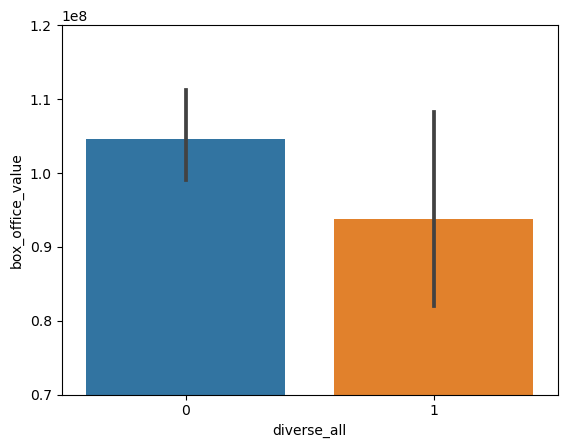

In [210]:
import seaborn as sns

ax = sns.barplot(x="diverse_all", y="box_office_value", data=df_diversity[['box_office_value','diverse_all']])
plt.ylim([7e7,12e7]);

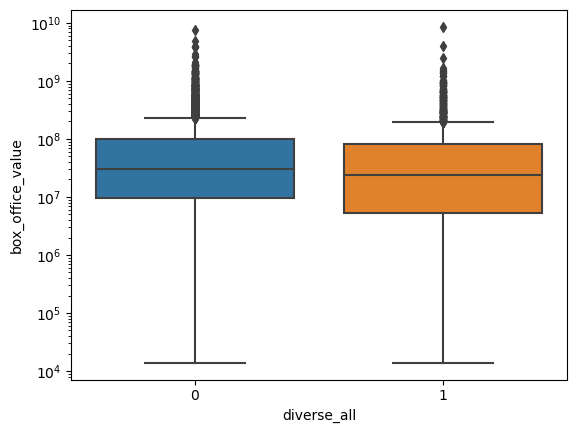

In [236]:
ax = sns.boxplot(x="diverse_all", y="box_office_value", data=df_diversity[['box_office_value','diverse_all']])
ax.set_yscale('log')